# Telco Churn



By Lindy Castellaw 7/14/2022

# Goal

This project is about identifing the main drivers for churn and what recomendations can be made to reduce it.

## Description

Predicting customer churn is critical for telecommunication companies to be able to retain customers. 
Especially because it is more costly to acquire new customers than to keep existing ones.
My goal is to identify main drivers of churn as well as which customers are at risk,
and to make any recommendations for changes so that we can reduce the churn rate and increase customer retention.
i have explored and the data by using visualizations and built models to predict how likely a customer will churn by analyzing certain features: demographic (gender, dependents), account (monthly charges, contract), and services information (internet services).

## Questions

My first question is if monthly cost has anything to do with churn? 

What services churn more?

what kind of contract do the customers have?

## Wrangle data

First thing to do is to acquire the Telco data from the aquire.py file.

In [1]:
import acquire 

df = acquire.get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


To clean the data i made dummy variables for non-binary categorical variables, encoded categorical variables to numeric, dropped duplicate and null values.

I split the data into train, validate and test.

In [2]:
import pandas as pd
import prepare_telco

train,validate,test = prepare_telco.prep_telco_data(df)

In [4]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,gender_Male
4216,5950-AAAGJ,Male,0,No,No,18,Yes,Yes,No,No,...,0,0,0,0,1,0,0,0,0,1
1477,2186-QZEYA,Female,1,No,No,29,Yes,Yes,Yes,Yes,...,0,0,0,0,0,0,0,0,0,0
5752,8092-NLTGF,Male,0,No,No,72,Yes,Yes,No internet service,No internet service,...,1,0,0,1,0,1,0,0,0,1
1377,2040-LDIWQ,Male,0,Yes,Yes,65,Yes,Yes,No,Yes,...,0,1,0,1,0,0,0,0,0,1
3965,5578-NKCXI,Female,0,Yes,Yes,58,Yes,No,Yes,Yes,...,0,1,1,0,1,0,1,0,0,0


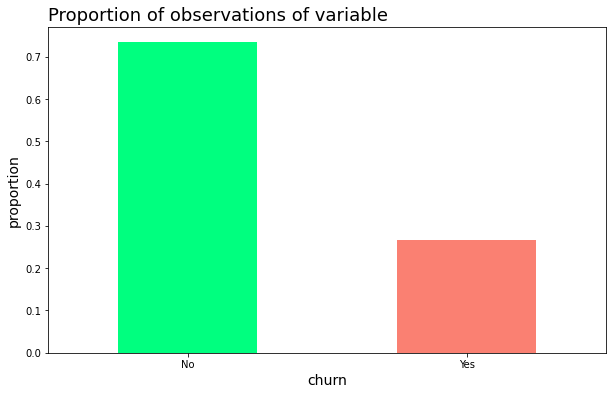

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = train['churn'].value_counts(normalize=True)

# bar plot showing the % of churn
prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['springgreen','salmon'])

ax.set_title('Proportion of observations of variable',
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('proportion',
              fontsize=14)
ax.tick_params(rotation='auto')

The proportion of train data. I want to know what makes up the churn column and find any correlation

Do monthly charges have an effect on churn?

Text(0.5, 1.0, 'MonthlyCharges vs Churn')

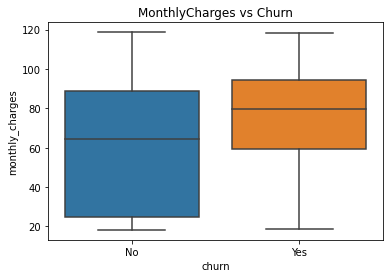

In [8]:
import seaborn as sns

sns.boxplot(train['churn'], train['monthly_charges'])
plt.title('MonthlyCharges vs Churn')

High monthly charges has a high churn rate so that is the one of feature we will test.

### H0 - monthly charges is a driver of churn
### Ha - monthly charges is not a driver of churn

In [9]:
# the categorical and continous variables i am testing
a2 = train.monthly_charges
b2 = train.churn

In [10]:
observed2 = pd.crosstab(a2,b2)
observed2

churn,No,Yes
monthly_charges,,
18.25,1,0
18.40,1,0
18.55,1,0
18.75,1,0
18.80,2,0
...,...,...
117.60,1,0
118.20,1,0
118.35,0,1


T-test on monthly charges since it is a continuous variable, and with alpha being .05

In [12]:
import scipy.stats as stats

alpha = 0.5

churn_sample = train[train.churn == 'Yes'].monthly_charges
overall_mean = train.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)


13.894206751306553 4.253501857566973e-41 0.5


In [13]:
if p/2 > alpha:
    print("We fail to reject null")
elif t < 0:
    print("We fail to reject null")
else:
    print("We reject null")

We reject null


The null hypothesis is rejected with the chi2 test

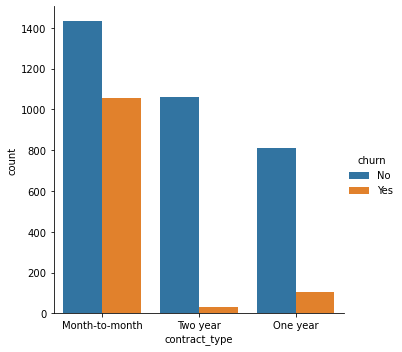

In [15]:
# churn by contract type
ax1 = sns.catplot(x="contract_type", kind="count", hue="churn", data=train,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

We will run a chi2 test on contract type and churn

### H0 - contract type is a driver of churn
### Ha - contract type is not a driver of churn

In [16]:
a3 = train.contract_type
b3 = train.churn

The variables I am testing are contact type and churn, since they are both categorical I will use Chi2 test.

In [17]:
observed3 = pd.crosstab(a3,b3)
observed3

churn,No,Yes
contract_type,,
Month-to-month,1433,1058
One year,811,107
Two year,1060,31


In [18]:
# chi2 test on contract type and churn

chi2, p, degf, expected = stats.chi2_contingency(observed3)

print('Observed\n:')
print(observed3.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
if p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

Observed
:
[[1433 1058]
 [ 811  107]
 [1060   31]]
------------------------
Expected: 

[[1828  662]
 [ 674  243]
 [ 801  289]]
------------------------

chi2 = 742.27
p value: 0.0000
We can reject the null hypothesis


The null had been rejected 

Do internest services have an effect on churn?

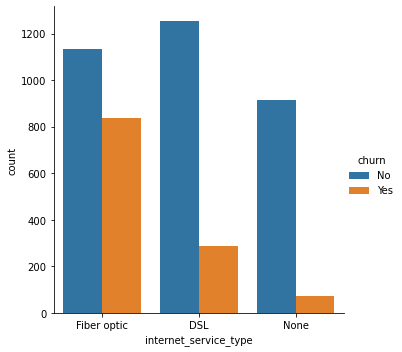

In [19]:
sns.catplot(x="internet_service_type", kind="count", hue="churn", data=train)

Internet service has high churn, especially Fiber optic.

We will run a Chi2 test since it is categorical

## H0 - internet service is a driver of churn
## Ha - internet service is not a driver of churn

In [20]:
# the categorical variables i am testing
a = train.internet_service_type
b = train.churn

In [21]:
observed = pd.crosstab(a,b)
observed

churn,No,Yes
internet_service_type,,
DSL,1254,286
Fiber optic,1135,837
None,915,73


In [22]:
# chi2 test on internet service type and churn

chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
if p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

Observed
:
[[1254  286]
 [1135  837]
 [ 915   73]]
------------------------
Expected: 

[[1130  409]
 [1447  524]
 [ 725  262]]
------------------------

chi2 = 491.42
p value: 0.0000
We can reject the null hypothesis


The test has a low P value so we know that internet service type is related to churn.

We will model contract type, internet service type, and monthly charges

### Modeling 

Set features and baseline for modeling.

In [23]:
# features
x_vars = ['contract_type_One year','contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'monthly_charges']
y_vars = 'churn_encoded'

X_train, y_train = train[x_vars], train[y_vars]
X_validate, y_validate = validate[x_vars], validate[y_vars]
X_test, y_test = test[x_vars], test[y_vars]

In [24]:
# baseline
baseline = y_train.mode()

matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline prediction: {baseline[0]}")
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline prediction: 0
Baseline accuracy: 0.73


Churn is categorical, we will use classification algorithms to fit to our train data and we will evaluate on validate. We will pick the best model using accuracy.

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

forest1 = RandomForestClassifier(max_depth=4, random_state=123)

forest1.fit(X_train, y_train)
y_predictions = forest1.predict(X_train)

report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of depth 4")
pd.DataFrame(report)

Tree of depth 4


,0,1,accuracy,macro avg,weighted avg
precision,0.851783,0.563137,0.77,0.707460,0.775067
recall,0.831416,0.600334,0.77,0.715875,0.770000
f1-score,0.841476,0.581141,0.77,0.711309,0.772285
support,3304.000000,1196.000000,0.77,4500.000000,4500.000000


Validate Model

In [32]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(forest1.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.75


Comparing in sample data to out of sample data.

In [39]:
from sklearn.metrics import confusion_matrix

metrics1 = []

for i in range(2, 25):
    forest = RandomForestClassifier(max_depth=3, random_state=123)
    forest = forest.fit(X_train, y_train)

    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.734222,0.734222,0.000000
1,3,0.764889,0.733333,0.031556
2,4,0.770000,0.752000,0.018000
3,5,0.770000,0.752000,0.018000
4,6,0.778000,0.739556,0.038444
5,7,0.783333,0.740444,0.042889
6,8,0.791333,0.734222,0.057111
7,9,0.802889,0.729778,0.073111
8,10,0.814222,0.735111,0.079111
9,11,0.828889,0.726222,0.102667


## Decision Tree

Baseline = 0.73

In [ ]:
# fit the model

tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

tree1 = tree1.fit(X_train, y_train)

y_predictions = tree1.predict(X_train)

In [ ]:
# plot the model

plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

Evaluate performance of Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734222,0.734222,0.000000
1,2,0.734222,0.734222,0.000000
2,3,0.766444,0.745778,0.020667
3,4,0.771333,0.749333,0.022000
4,5,0.772889,0.748444,0.024444
5,6,0.779778,0.737778,0.042000
6,7,0.782444,0.732444,0.050000
7,8,0.788222,0.730667,0.057556
8,9,0.792889,0.733333,0.059556
9,10,0.798667,0.730667,0.068000


## Logistic Regression

Baseline = 0.73

In [44]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=123)

features = ['contract_type_One year','contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'monthly_charges']

logit.fit(X_train[features], y_train)
y_pred = logit.predict(X_train[features])

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))


Accuracy of Logistic Regression classifier on training set: 0.77


Evaluate preformance on validate of Logistic Regression

In [45]:
y_pred = logit.predict(X_validate)

print("Logit model using all features and all model defaults")
print(classification_report(y_validate, y_pred))

Logit model using all features and all model defaults
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       826
           1       0.53      0.56      0.54       299

    accuracy                           0.75      1125
   macro avg       0.68      0.69      0.69      1125
weighted avg       0.75      0.75      0.75      1125



In [50]:
y_pred = logit.predict(X_test)
y_pred_proba = logit.predict_proba(X_test)

print("Model 1: solver = lbfgs, c = 1")

print('Accuracy: {:.2f}'.format(logit.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


Model 1: solver = lbfgs, c = 1
Accuracy: 0.76
[[859 174]
 [158 216]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1033
           1       0.55      0.58      0.57       374

    accuracy                           0.76      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.76      0.77      1407



In [60]:
c_id = pd.DataFrame(test.customer_id)

In [63]:
c_id.reset_index(drop = True)

,customer_id
0,4716-MRVEN
1,8966-KZXXA
2,8720-RQSBJ
3,7504-UWHNB
4,1730-VFMWO
...,...
1402,0877-SDMBN
1403,5555-RNPGT
1404,4628-CTTLA
1405,0516-QREYC


In [67]:
pred = pd.DataFrame(logit.predict(X_test))

In [68]:
pred

,0
0,0
1,0
2,0
3,1
4,0
...,...
1402,0
1403,0
1404,0
1405,0


In [62]:
proba = pd.DataFrame(logit.predict_proba(X_test))[1]
proba

0       0.044799
1       0.013115
2       0.335713
3       0.617481
4       0.315238
          ...   
1402    0.185759
1403    0.155794
1404    0.351663
1405    0.164908
1406    0.220390
Name: 1, Length: 1407, dtype: float64

In [64]:
c_id_proba = c_id.join(proba, how = 'right')

In [69]:
c_id_proba_pred = c_id_proba.join(pred, how = 'right')

In [70]:
c_id_proba_pred.to_csv('telco_pred_proba_churn')

In [71]:
c_id_proba_pred

,customer_id,1,0
0,NaN,0.044799,0
1,NaN,0.013115,0
2,NaN,0.335713,0
3,NaN,0.617481,1
4,NaN,0.315238,0
...,...,...,...
1402,2074-GKOWZ,0.185759,0
1403,NaN,0.155794,0
1404,NaN,0.351663,0
1405,NaN,0.164908,0
